In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/burn-data-seg/burn_intensity_data/train_images/quarry_ca3806111999220230909_0224_0000_HLS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_images/mountain_az_0224_0224_HLS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_images/or4265012082720180815_0000_0448_HLS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_images/rabbit_ca3671811888320230930_0000_0000_HLS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_images/dixie_id4558511544420210705_0000_0224_HLS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_images/nm3372410853720180522_0000_0448_HLS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_images/quarry_ca3806111999220230909_0000_0000_HLS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_images/grizzlycreek_0224_0224_HLS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_images/dixie_id4558511544420210705_0000_0000_HLS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_images/indian_

In [2]:
!pip install gdal

In [1]:
!pip install terratorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.1/849.1 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 61.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 111.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 69.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━

In [3]:
import os
import torch


from terratorch import BACKBONE_REGISTRY

wxc_downscaling not installed


In [55]:
print([model_name for model_name in BACKBONE_REGISTRY if "prithvi" in model_name])

['timm_prithvi_eo_v2_300', 'timm_prithvi_eo_v2_300_tl', 'timm_prithvi_eo_v2_600', 'timm_prithvi_eo_v2_600_tl', 'timm_prithvi_swin_B', 'timm_prithvi_swin_L', 'timm_prithvi_vit_100', 'timm_prithvi_vit_tiny']


In [10]:
"prithvi_vit_100" in BACKBONE_REGISTRY

True

In [54]:
model = BACKBONE_REGISTRY.build("timm_prithvi_eo_v2_300")

In [56]:
print(f"The model was pretrained on bands {model._timm_module.pretrained_bands}.\n The model is using bands {model._timm_module.model_bands}")

The model was pretrained on bands [<HLSBands.BLUE: 'BLUE'>, <HLSBands.GREEN: 'GREEN'>, <HLSBands.RED: 'RED'>, <HLSBands.NIR_NARROW: 'NIR_NARROW'>, <HLSBands.SWIR_1: 'SWIR_1'>, <HLSBands.SWIR_2: 'SWIR_2'>].
 The model is using bands [<HLSBands.BLUE: 'BLUE'>, <HLSBands.GREEN: 'GREEN'>, <HLSBands.RED: 'RED'>, <HLSBands.NIR_NARROW: 'NIR_NARROW'>, <HLSBands.SWIR_1: 'SWIR_1'>, <HLSBands.SWIR_2: 'SWIR_2'>]


In [57]:
trial_data = torch.zeros(1, 6, 224, 224) # batch_size, channels, height, width
features = model(trial_data)
for index, feature in enumerate(features):
    print(f"Feature index {index} has shape {feature.shape}")

Feature index 0 has shape torch.Size([1, 197, 1024])
Feature index 1 has shape torch.Size([1, 197, 1024])
Feature index 2 has shape torch.Size([1, 197, 1024])
Feature index 3 has shape torch.Size([1, 197, 1024])
Feature index 4 has shape torch.Size([1, 197, 1024])
Feature index 5 has shape torch.Size([1, 197, 1024])
Feature index 6 has shape torch.Size([1, 197, 1024])
Feature index 7 has shape torch.Size([1, 197, 1024])
Feature index 8 has shape torch.Size([1, 197, 1024])
Feature index 9 has shape torch.Size([1, 197, 1024])
Feature index 10 has shape torch.Size([1, 197, 1024])
Feature index 11 has shape torch.Size([1, 197, 1024])
Feature index 12 has shape torch.Size([1, 197, 1024])
Feature index 13 has shape torch.Size([1, 197, 1024])
Feature index 14 has shape torch.Size([1, 197, 1024])
Feature index 15 has shape torch.Size([1, 197, 1024])
Feature index 16 has shape torch.Size([1, 197, 1024])
Feature index 17 has shape torch.Size([1, 197, 1024])
Feature index 18 has shape torch.Size(

In [58]:
from terratorch.datasets import HLSBands

# lets get only the RGB bands, and put them in that order rather than BGR, and lets add an extra band not in HLSBands
bands = [HLSBands.RED, HLSBands.GREEN, HLSBands.BLUE, 14]
model = BACKBONE_REGISTRY.build( # let's use a vit model this time
    "prithvi_vit_100", num_frames=1, pretrained=True, bands=bands )


In [59]:
# the model now expects 4 channels, not 6
trial_data = torch.zeros(1, 4, 224, 224) # batch_size, channels, height, width
features = model(trial_data)
for index, feature in enumerate(features):
    print(f"Feature index {index} has shape {feature.shape}")

Feature index 0 has shape torch.Size([1, 197, 768])
Feature index 1 has shape torch.Size([1, 197, 768])
Feature index 2 has shape torch.Size([1, 197, 768])
Feature index 3 has shape torch.Size([1, 197, 768])
Feature index 4 has shape torch.Size([1, 197, 768])
Feature index 5 has shape torch.Size([1, 197, 768])
Feature index 6 has shape torch.Size([1, 197, 768])
Feature index 7 has shape torch.Size([1, 197, 768])
Feature index 8 has shape torch.Size([1, 197, 768])
Feature index 9 has shape torch.Size([1, 197, 768])
Feature index 10 has shape torch.Size([1, 197, 768])
Feature index 11 has shape torch.Size([1, 197, 768])


In [60]:
from terratorch.models import EncoderDecoderFactory

model_factory = EncoderDecoderFactory()

# Let's build a segmentation model
# Parameters prefixed with backbone_ get passed to the backbone
# Parameters prefixed with decoder_ get passed to the decoder
# Parameters prefixed with head_ get passed to the head

model = model_factory.build_model(task="segmentation",
        backbone="prithvi_vit_100",
        decoder="UperNetDecoder",
        backbone_bands=[
            HLSBands.BLUE,
            HLSBands.GREEN,
            HLSBands.RED,
            HLSBands.NIR_NARROW,
            HLSBands.SWIR_1,
            HLSBands.SWIR_2,
        ],
        num_classes=5,
        backbone_pretrained=True,
        backbone_num_frames=1,
        decoder_channels=128,
        head_dropout=0.2
    )
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

PixelWiseModel(
  (encoder): TimmBackboneWrapper(
    (_timm_module): PrithviViT(
      (patch_embed): PatchEmbed(
        (proj): Conv3d(6, 768, kernel_size=(1, 16, 16), stride=(1, 16, 16))
        (norm): Identity()
      )
      (blocks): ModuleList(
        (0-11): 12 x Block(
          (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (act): GELU(approximate='none')
       

In [61]:
#trying something else
from terratorch.models import EncoderDecoderFactory

model_factory = EncoderDecoderFactory()

# Let's build a segmentation model
# Parameters prefixed with backbone_ get passed to the backbone
# Parameters prefixed with decoder_ get passed to the decoder
# Parameters prefixed with head_ get passed to the head

model = model_factory.build_model(task="segmentation",
        backbone="timm_prithvi_eo_v2_300",
        decoder="DeepLabV3",
        backbone_bands=[
            HLSBands.BLUE,
            HLSBands.GREEN,
            HLSBands.RED,
            HLSBands.NIR_NARROW,
            HLSBands.SWIR_1,
            HLSBands.SWIR_2,
        ],
        num_classes=5,
        backbone_pretrained=True,
        backbone_num_frames=1,
        decoder_channels=128,
        head_dropout=0.2
    )
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

PixelWiseModel(
  (encoder): TimmBackboneWrapper(
    (_timm_module): PrithviViT(
      (patch_embed): PatchEmbed(
        (proj): Conv3d(6, 1024, kernel_size=(1, 16, 16), stride=(1, 16, 16))
        (norm): Identity()
      )
      (blocks): ModuleList(
        (0-23): 24 x Block(
          (norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (act): GELU(approximate='none')


In [62]:
# download the image
!wget https://huggingface.co/spaces/ibm-nasa-geospatial/Prithvi-100M-Burn-scars-demo/resolve/main/subsetted_512x512_HLS.S30.T10TGS.2018285.v1.4_merged.tif

input_file_name = "subsetted_512x512_HLS.S30.T10TGS.2018285.v1.4_merged.tif"
label_file_name = "subsetted_512x512_HLS.S30.T10TGS.2018285.v1.4.mask.tif"

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2025-01-09 15:19:33--  https://huggingface.co/spaces/ibm-nasa-geospatial/Prithvi-100M-Burn-scars-demo/resolve/main/subsetted_512x512_HLS.S30.T10TGS.2018285.v1.4_merged.tif
Resolving huggingface.co (huggingface.co)... 18.172.134.124, 18.172.134.4, 18.172.134.88, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/1c/09/1c0948cc618defc1284e350591d02a434dcb4e42e8be4eb411c4ccbaae569c03/4680447af6e80df15616c5148a7d004d9c958905c082ea51b16c2e9e4ab29d85?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27subsetted_512x512_HLS.S30.T10TGS.2018285.v1.4_merged.tif%3B+filename%3D%22subsetted_512x512_HLS.S30.T10TGS.2018285.v1.4_merged.tif%22%3B&response-content-type=image%2Ftiff&Expires=1736695173&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNjY5NTE3M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy8xYy8wOS8xYzA5NDhj

In [63]:
# organize the data directory
import shutil
import matplotlib.pyplot as plt
import rioxarray as rio

#if not os.path.isdir("/content/burn_scar_segmentation_toy"):
source_dir = "/content/burn_intensity_dataset/burn_intensity_data"
source_dir = "/kaggle/input/burn-data-seg/burn_intensity_data"
if not os.path.isdir(source_dir):

    os.mkdir(source_dir)

    for data_dir in ["train_images", "test_images", "validation_images"]:
        os.mkdir(os.path.join(source_dir, data_dir))
        shutil.copy(input_file_name, os.path.join(source_dir, data_dir, input_file_name))

    for label_dir in ["train_labels", "test_labels", "validation_labels"]:
        os.mkdir(os.path.join(source_dir, label_dir))
        shutil.copy(label_file_name, os.path.join(source_dir, label_dir, label_file_name))



In [64]:
import os

# Specify the directory path
train_image_folder= "/kaggle/input/burn-data-seg/burn_intensity_data/train_images"
train_label_folder= "/kaggle/input/burn-data-seg/burn_intensity_data/train_labels"


val_image_folder= "/kaggle/input/burn-data-seg/burn_intensity_data/validation_images"
val_label_folder= "/kaggle/input/burn-data-seg/burn_intensity_data/validation_labels"

test_image_folder= "/kaggle/input/burn-data-seg/burn_intensity_data/test_images"
test_label_folder= "/kaggle/input/burn-data-seg/burn_intensity_data/test_labels"


# Get the full file path of the first file
files_image = sorted([f for f in os.listdir(train_image_folder) if os.path.isfile(os.path.join(train_image_folder, f))])
if files_image:
    first_file = files_image[1]  # Get the first file
    first_image_path = os.path.join(train_image_folder, first_file)  # Full path to the file
    print(f"First file: {first_file}")
    print(f"Full path: {first_image_path}")
else:
    print("The directory is empty.")

files_label = sorted([f for f in os.listdir(train_label_folder) if os.path.isfile(os.path.join(train_label_folder, f))])
if files_label:
    first_file = files_label[1]  # Get the first file
    first_label_path = os.path.join(train_label_folder, first_file)  # Full path to the file
    print(f"First file: {first_file}")
    print(f"Full path: {first_label_path}")
else:
    print("The directory is empty.")


file_image_path = os.path.join(train_image_folder, first_image_path)
file_label_path = os.path.join(train_label_folder, first_label_path)
print(file_image_path)
print(file_label_path)

# if file_name:
#     file_path = os.path.join(source_dir, file_name)  # Create the full file path
#     print(f"First file path: {file_path}")
# else:
#     print("The directory is empty.")


First file: az3455711116020180427_0224_0000_HLS.tiff
Full path: /kaggle/input/burn-data-seg/burn_intensity_data/train_images/az3455711116020180427_0224_0000_HLS.tiff
First file: az3455711116020180427_0224_0000_BS.tiff
Full path: /kaggle/input/burn-data-seg/burn_intensity_data/train_labels/az3455711116020180427_0224_0000_BS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_images/az3455711116020180427_0224_0000_HLS.tiff
/kaggle/input/burn-data-seg/burn_intensity_data/train_labels/az3455711116020180427_0224_0000_BS.tiff


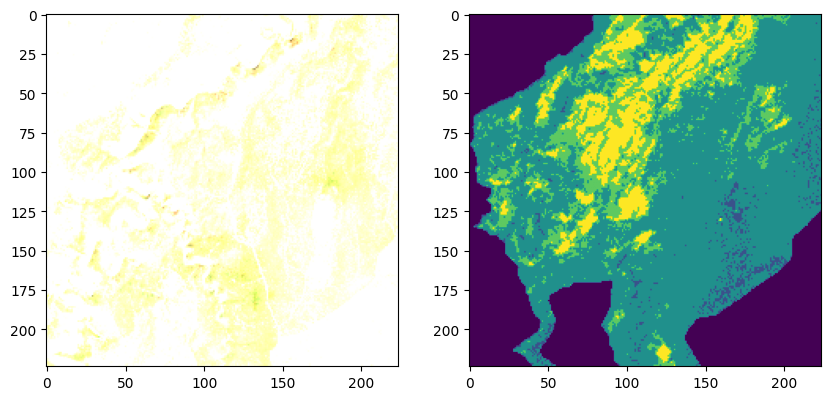

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(rio.open_rasterio(file_image_path).sel(band=[3, 2, 1]).transpose("y", "x", "band").to_numpy())

ax[1].imshow(rio.open_rasterio(file_label_path).to_numpy()[0])

In [66]:
tensor = rio.open_rasterio(file_label_path).to_numpy()
print(tensor.shape)

import numpy as np
np.unique(tensor)

(1, 224, 224)


array([0., 1., 2., 3., 4.])

In [67]:
import rasterio
import numpy as np
import os
from tqdm import tqdm

# Paths to the folders containing the images
train_image_folder = "/kaggle/input/burn-data-seg/burn_intensity_data/train_images"
val_image_folder = "/kaggle/input/burn-data-seg/burn_intensity_data/validation_images"

bands_order = ['BLUE', 'GREEN', 'RED', 'NIR', 'SWIR_1', 'SWIR_2']
num_bands = len(bands_order)
sum_bands = np.zeros(num_bands, dtype=np.float64)
sum_squared_diffs = np.zeros(num_bands, dtype=np.float64)
total_pixels = np.zeros(num_bands, dtype=np.int64)

# Function to process a folder and accumulate stats
def process_folder(folder_path):
    global sum_bands, sum_squared_diffs, total_pixels
    for image_file in tqdm(os.listdir(folder_path), desc=f"Processing {folder_path}"):
        file_path = os.path.join(folder_path, image_file)
        
        with rasterio.open(file_path) as src:
            image_data = src.read().astype(np.float64)
            nodata_value = src.nodata  # Get the no-data value (e.g., -9999)
        
        for i in range(num_bands):
            band_data = image_data[i, :, :]
            
            # Mask no-data values and clip negative values to zero
            valid_pixels = (band_data != nodata_value) & (band_data >= 0)
            valid_band_data = band_data[valid_pixels]
            
            # Only accumulate if there are valid pixels
            if valid_band_data.size > 0:
                sum_bands[i] += np.sum(valid_band_data)
                sum_squared_diffs[i] += np.sum((valid_band_data - np.mean(valid_band_data)) ** 2)
                total_pixels[i] += valid_band_data.size

# Process both train and validation folders
process_folder(train_image_folder)
process_folder(val_image_folder)

# Compute mean and standard deviation for each band
means_ = sum_bands / total_pixels
stds_ = np.sqrt(sum_squared_diffs / total_pixels)

# Replace any negative means with a small positive value
MEANS = {band: round(max(means_[i], 0.01), 4) for i, band in enumerate(bands_order)}
STDS = {band: round(stds_[i], 4) for i, band in enumerate(bands_order)}
print("MEANS =", MEANS)
print("STDS =", STDS)

MEANS = {'BLUE': 350.7673, 'GREEN': 533.9899, 'RED': 617.2553, 'NIR': 1640.5476, 'SWIR_1': 1180.0582, 'SWIR_2': 1761.7007}
STDS = {'BLUE': 258.2673, 'GREEN': 291.0636, 'RED': 342.4452, 'NIR': 627.7795, 'SWIR_1': 538.4357, 'SWIR_2': 581.7906}
bands = ["BLUE", "GREEN", "RED", "NIR", "SWIR_1", "SWIR_2"]

means = [MEANS[b] for b in bands]
stds = [STDS[b] for b in bands]

Processing /kaggle/input/burn-data-seg/burn_intensity_data/train_images: 100%|██████████| 236/236 [00:04<00:00, 55.94it/s]
Processing /kaggle/input/burn-data-seg/burn_intensity_data/validation_images: 100%|██████████| 30/30 [00:00<00:00, 55.22it/s]

MEANS = {'BLUE': 350.7673, 'GREEN': 533.9899, 'RED': 617.2553, 'NIR': 1640.5476, 'SWIR_1': 1180.0582, 'SWIR_2': 1761.7007}
STDS = {'BLUE': 258.2673, 'GREEN': 291.0636, 'RED': 342.4452, 'NIR': 627.7795, 'SWIR_1': 538.4357, 'SWIR_2': 581.7906}


In [68]:
from terratorch.datamodules import GenericNonGeoSegmentationDataModule

batch_size = 8
num_workers = 0
train_val_test = [
    train_image_folder,
    val_image_folder,
    test_image_folder
]

train_val_test_labels = {
    "train_label_data_root": train_label_folder,
    "val_label_data_root": val_label_folder,
    "test_label_data_root": test_label_folder,
}

# from https://github.com/NASA-IMPACT/hls-foundation-os/blob/main/configs/burn_scars.py
# means=[
#         0.033349706741586264,
#         0.05701185520536176,
#         0.05889748132001316,
#         0.2323245113436119,
#         0.1972854853760658,
#         0.11944914225186566,
#     ]
# stds=[
#         0.02269135568823774,
#         0.026807560223070237,
#         0.04004109844362779,
#         0.07791732423672691,
#         0.08708738838140137,
#         0.07241979477437814,
#     ]

datamodule = GenericNonGeoSegmentationDataModule(
    batch_size,
    num_workers,
    *train_val_test,
    "*_HLS.tiff", # img grep
    "*_BS.tiff", # label grep
    means,
    stds,
    num_classes = 5, # num classes
    **train_val_test_labels,

    # if transforms are defined with Albumentations, you can pass them here
    # train_transform=train_transform,
    # val_transform=val_transform,
    # test_transform=test_transform,

    # edit the below for your usecase
    dataset_bands=[
        HLSBands.BLUE,
        HLSBands.GREEN,
        HLSBands.RED,
        HLSBands.NIR_NARROW,
        HLSBands.SWIR_1,
        HLSBands.SWIR_2,
    ],
    output_bands=[
        HLSBands.BLUE,
        HLSBands.GREEN,
        HLSBands.RED,
        HLSBands.NIR_NARROW,
        HLSBands.SWIR_1,
        HLSBands.SWIR_2,
    ],
    no_data_replace=0,
    no_label_replace=-1,
)
# we want to access some properties of the train dataset later on, so lets call setup here
# if not, we would not need to
datamodule.setup("fit")

In [ ]:

from terratorch.models.model import AuxiliaryHead
from terratorch.tasks import SemanticSegmentationTask

epochs = 80 # 1 epoch for demo
lr = 1e-3
model_args = {
        #"backbone":"prithvi_vit_100",
        'backbone': "timm_prithvi_eo_v2_300",
        #"decoder":"FCNDecoder",
        "decoder": "DeepLabV3",
        "num_classes": 5,

        "backbone_bands": [
            HLSBands.RED,
            HLSBands.GREEN,
            HLSBands.BLUE,
            HLSBands.NIR_NARROW,
            HLSBands.SWIR_1,
            HLSBands.SWIR_2,
        ],
        "backbone_pretrained": True,
        "backbone_num_frames":1, # this is the default
        "decoder_channels":512,
        "head_dropout":0.2,
        "necks": [
            {"name": "SelectIndices", "indices": [-1]},
            {"name": "ReshapeTokensToImage"}
        ]
}



task = SemanticSegmentationTask(
    model_args,
    "EncoderDecoderFactory",
    loss="ce",
    aux_loss={"fcn_aux_head": 0.4},
    lr=lr,
    ignore_index=-1,
    optimizer="AdamW",
    optimizer_hparams={"weight_decay": 0.05},
    freeze_backbone=True,

    class_names=['No burn', 'Unburned to Very Low', 'Low Severity', 'Moderate Severity','High Severity'],
    class_weights=[0.01, 0.1, 0.19, 0.2, 0.5]
    
)

In [77]:
import os

from lightning.pytorch import Trainer
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor, ModelCheckpoint, RichProgressBar
from lightning.pytorch.loggers import TensorBoardLogger
import os
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim import AdamW

accelerator = "gpu"
experiment = "tutorial"
if not os.path.isdir("tutorial_experiments"):
    os.mkdir("tutorial_experiments")
default_root_dir = os.path.join("tutorial_experiments", experiment)
checkpoint_callback = ModelCheckpoint(monitor=task.monitor, save_top_k=1, save_last=True)
early_stopping_callback = EarlyStopping(monitor=task.monitor, min_delta=0.00, patience=10)
logger = TensorBoardLogger(save_dir=default_root_dir, name=experiment)
#reduce_lr = ReduceLROnPlateau(optimizer = task,
 #                             patience=5)
trainer = Trainer(
    precision="bf16-mixed",
    accelerator=accelerator,
    callbacks=[
        RichProgressBar(),
        checkpoint_callback,
        LearningRateMonitor(logging_interval="epoch"),
        early_stopping_callback
    ],
    logger=logger,
    max_epochs=epochs, # train only one epoch for demo
    default_root_dir=default_root_dir,
    log_every_n_steps=1,
    check_val_every_n_epoch=10,
    devices=1
)


INFO: Using bfloat16 Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory tutorial_experiments/tutorial/tutorial/version_8/checkpoints exists and is not empty.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model         │ PixelWiseModel   │  312 M │ train │
│ 1 │ criterion     │ CrossEntropyLoss │      0 │ train │
│ 2 │ train_metrics │ MetricCollection │      0 │ train │
│ 3 │ val_metrics   │ MetricCollection │      0 │ train │
│ 4 │ test_metrics  │ ModuleList       │      0 │ train │
└───┴───────────────┴──────────────────┴────────┴───────┘

Trainable params: 8.5 M                                                                                            
Non-trainable params: 303 M                                                                                        
Total params: 312 M                                                                                                
Total estimated model params size (MB): 1.2 K                                                                      
Modules in train mode: 583                                                                                         
Modules in eval mode: 0

Output()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.

INFO: `Trainer.fit` stopped: `max_epochs=80` reached.


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Output()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                   Test metric                    ┃                   DataLoader 0                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│             test/Multiclass_Accuracy             │                0.5778685808181763                │
│             test/Multiclass_F1_Score             │                0.5778685808181763                │
│          test/Multiclass_Jaccard_Index           │               0.27181220054626465                │
│       test/Multiclass_Jaccard_Index_Micro        │               0.40633976459503174                │
│                    test/loss                     │                1.662861943244934                 │
│      test/multiclassaccuracy_High Severity       │               0.32772454619407654                │
│       test/multiclassaccuracy_Low Severity       │               0.45364758372306824                │
│    test/multiclassaccuracy_Moderate Severity     │               0.45608317852020264                │
│         test/multiclassaccuracy_No burn          │                0.6893621683120728                │
│   test/multiclassaccuracy_Unburned to Very Low   │               0.06860829889774323                │
│    test/multiclassjaccardindex_High Severity     │                0.2430497705936432                │
│     test/multiclassjaccardindex_Low Severity     │               0.22557984292507172                │
│  test/multiclassjaccardindex_Moderate Severity   │               0.22942745685577393                │
│       test/multiclassjaccardindex_No burn        │                0.6301622986793518                │
│ test/multiclassjaccardindex_Unburned to Very Low │               0.03084161877632141                │
└──────────────────────────────────────────────────┴──────────────────────────────────────────────────┘

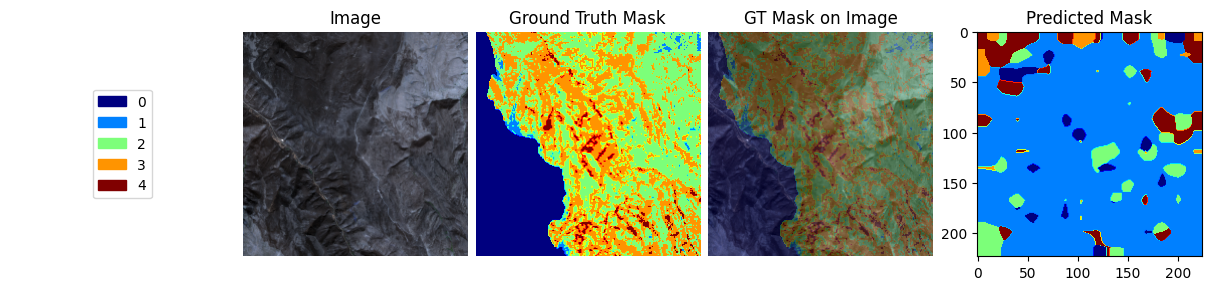

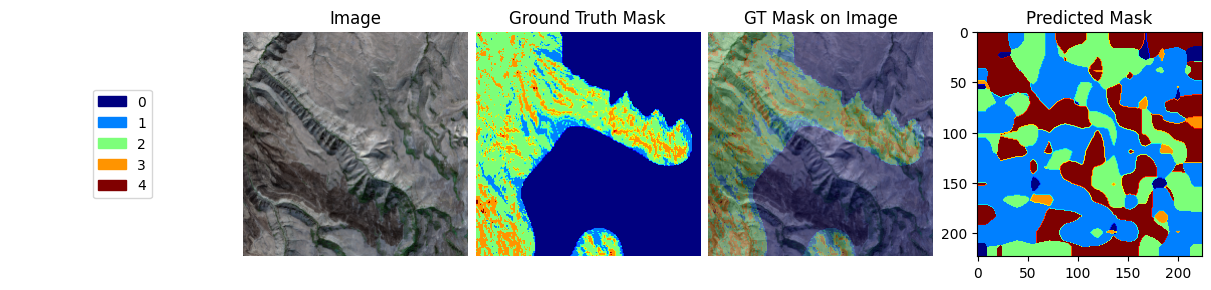

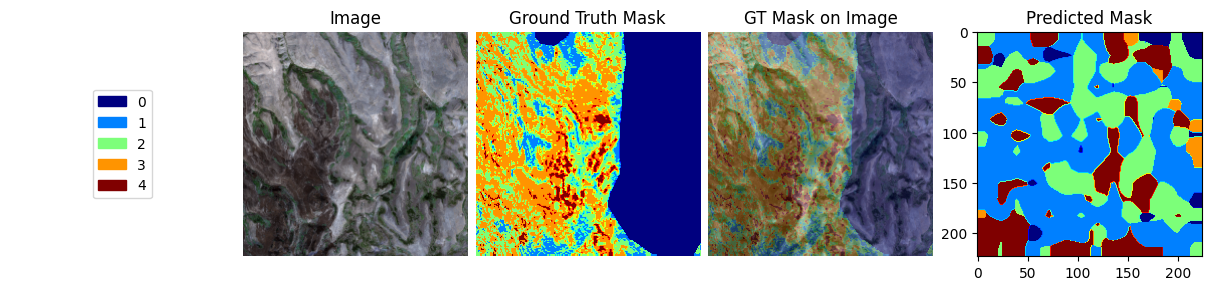

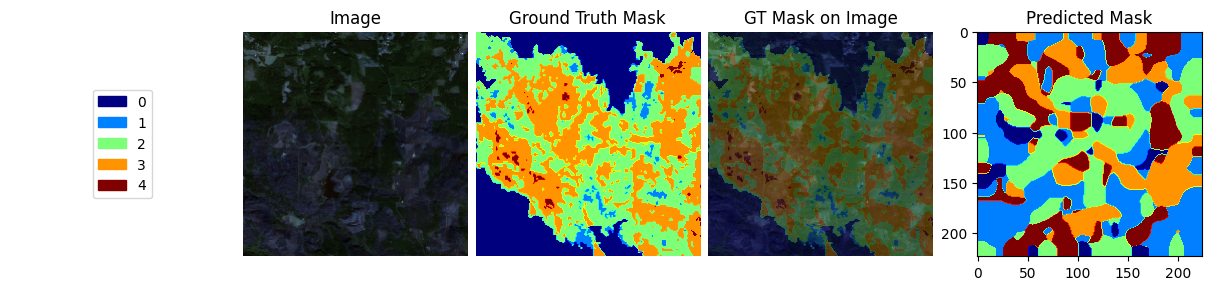

In [80]:
#trying with timm_prithvi_eo_v2_300, 16 mixed, updated means and std
trainer.fit(model=task, datamodule=datamodule)
trainer.test(model=task, datamodule=datamodule)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_loader = datamodule.test_dataloader()
model.to(device)
with torch.no_grad():
    batch = next(iter(test_loader))
    images = batch["image"].to(device)

    masks = batch["mask"].numpy()
    other_keys = batch.keys() - {"image", "mask", "filename"}
    rest = {k: batch[k].to(device) for k in other_keys}

    outputs = model(images, **rest)
    preds = torch.argmax(outputs.output, dim=1).cpu().numpy()

for i in range(4):
    sample = {key: batch[key][i] for key in batch}
    sample["prediction"] = preds[i]
    test_dataset = datamodule.test_dataset
    test_dataset.plot(sample)